In [1]:
pip install tensorflow==2.2.0


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


# import  the data

In [2]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 

In [3]:
import h5py
h5f = h5py.File("Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r+')

In [4]:
#Names of the groups in Hdfs file
for key in h5f.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


# Data pre-processing & visualisation

In [5]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]


Checking few contents of features and labels of one example from the images

In [6]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [7]:
y_train[:1]

array([2], dtype=uint8)

In [8]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [9]:
y_test[:1]

array([1], dtype=uint8)

In [10]:
X_val[:1]

array([[[ 44.299 ,  45.9999,  51.3306, ...,  25.2764,  27.515 ,
          27.156 ],
        [ 49.1351,  60.3081,  70.1222, ...,  23.7002,  25.2378,
          24.2918],
        [ 60.7595,  83.7141, 102.1961, ...,  24.5044,  24.9712,
          22.8512],
        ...,
        [ 67.1072,  93.2464, 109.2017, ...,  26.6444,  24.6015,
          22.9607],
        [ 24.7569,  36.6417,  48.9071, ...,  21.9268,  21.5309,
          21.5479],
        [ 22.6584,  22.7724,  27.2666, ...,  21.443 ,  20.8191,
          20.0812]]], dtype=float32)

In [11]:
y_val[:1]

array([0], dtype=uint8)

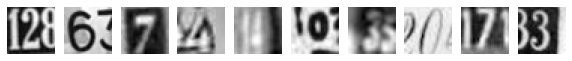

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [12]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [13]:
X_train.shape

(42000, 32, 32)

In [14]:
y_train.shape

(42000,)


Need to reshape the X_train and X_test so that the same can be fed for model building. Currently we have a 3D tensor and we need to feed a 2D tensor into the model.

We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [15]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)



Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [16]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


# Designing, training, tuning and testing a neural network image classifier.

#### Building the neural network model, fitting the training data, testing it and providing model summary.

In [17]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

creating an object of our model

In [19]:
# build the model
model = nn_model()

In [20]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Fitting the model on the training dataset along with it's equivalent one hot encoded labels

In [21]:
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 2s - loss: 2.2462 - accuracy: 0.1456 - val_loss: 2.0608 - val_accuracy: 0.2337
Epoch 2/100
140/140 - 2s - loss: 1.8330 - accuracy: 0.3398 - val_loss: 1.6336 - val_accuracy: 0.4171
Epoch 3/100
140/140 - 2s - loss: 1.5856 - accuracy: 0.4502 - val_loss: 1.4940 - val_accuracy: 0.4877
Epoch 4/100
140/140 - 2s - loss: 1.4319 - accuracy: 0.5191 - val_loss: 1.3515 - val_accuracy: 0.5492
Epoch 5/100
140/140 - 2s - loss: 1.3302 - accuracy: 0.5619 - val_loss: 1.3222 - val_accuracy: 0.5590
Epoch 6/100
140/140 - 2s - loss: 1.2491 - accuracy: 0.5941 - val_loss: 1.2216 - val_accuracy: 0.6071
Epoch 7/100
140/140 - 2s - loss: 1.1951 - accuracy: 0.6168 - val_loss: 1.1648 - val_accuracy: 0.6308
Epoch 8/100
140/140 - 2s - loss: 1.1642 - accuracy: 0.6290 - val_loss: 1.1960 - val_accuracy: 0.6102
Epoch 9/100
140/140 - 2s - loss: 1.1425 - accuracy: 0.6382 - val_loss: 1.1350 - val_accuracy: 0.6391
Epoch 10/100
140/140 - 2s - loss: 1.0856 - accuracy: 0.6576 - val_loss: 1.0792 - val_accura

# Plotting the training loss, validation loss vs number of epochs and training accuracy,

### validation accuracy vs number of epochs plot

In [22]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.701102077960968
Accuracy: 0.8086110949516296


Text(0.5, 1.0, 'Training and validation loss')

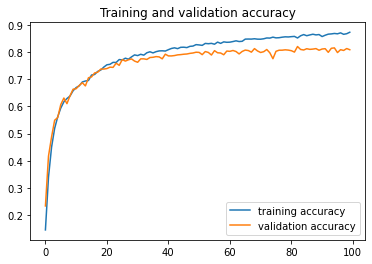

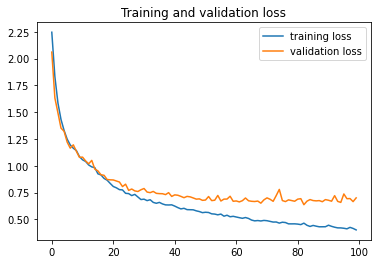

In [23]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.86 %.